# Boosting

Boosting is an advanced ensemble learning technique that builds upon the fundamental concept of combining multiple weak learners to create a strong predictive model. Unlike random forests, which use bagging (bootstrap aggregating) to train trees in parallel with random subsets of data, boosting employs a sequential approach to model training, where each subsequent model specifically focuses on correcting the errors made by its predecessors.

In the boosting process, the first model is trained using the complete training dataset, which distinguishes it from bagging methods. After the initial model makes its predictions, it inevitably produces some errors - whether in classification accuracy or regression mean square error. The key innovation of boosting lies in how it handles these errors: the second model in the sequence is designed to pay special attention to the data points that were misclassified or poorly predicted by the first model. This is accomplished by assigning higher weights to these problematic data points or by directly attempting to predict the errors made by the previous model.

The sequential nature of boosting continues as more models are added to the ensemble. The third model works to correct the combined errors of the first two models, the fourth model addresses the collective errors of the first three, and so on. This iterative error correction process is what gives boosting its name - it progressively "boosts" the overall predictive performance of the ensemble by focusing each new model on the specific areas where previous models struggled. This sequential learning and error correction process makes boosting a particularly powerful technique in machine learning, especially for handling complex prediction tasks where simple models might struggle to capture all the nuances in the data.

### Understanding Boosting Algorithms: AdaBoost and Gradient Boosting

AdaBoost and Gradient Boosting represent two fundamental approaches to boosting in machine learning, each with its unique methodology for improving model performance. AdaBoost, the pioneering boosting algorithm, operates on a weight-adjustment principle where each training sample initially receives equal weight ($w_i = \frac{1}{N}$). The algorithm iteratively trains weak learners (typically decision stumps) and updates sample weights based on classification performance. After each iteration $t$, the model's weight is calculated as $\alpha_t = \frac{1}{2}\ln(\frac{1-\epsilon_t}{\epsilon_t})$, where $\epsilon_t$ is the weighted error rate. The final prediction is a weighted combination of all weak learners: $F(x) = \sum_{t=1}^T \alpha_t h_t(x)$.

Gradient Boosting, on the other hand, approaches the problem from an optimization perspective, aiming to minimize a differentiable loss function $L(y, F(x))$. The algorithm begins with an initial prediction $F_0(x) = \arg\min_\gamma \sum L(y_i, \gamma)$ and iteratively builds new models to predict the negative gradients (residuals) of the loss function. At each iteration $m$, it computes the negative gradients $r_{im} = -[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]_{F=F_{m-1}}$, fits a weak learner $h_m(x)$ to these residuals, and updates the model with an optimal step size $\gamma_m$: $F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$.

Both algorithms incorporate regularization through hyperparameters such as the learning rate $\eta$ and the number of estimators $T$. The learning rate scales each weak learner's contribution: $F_m(x) = F_{m-1}(x) + \eta\gamma_m h_m(x)$, helping to prevent overfitting. In practice, Gradient Boosting often demonstrates superior performance due to its flexibility in loss function selection and better handling of various data types. The loss function can be customized for different tasks - for regression, mean squared error $L(y, F) = \frac{1}{2}(y - F)^2$, and for classification, log loss $L(y, F) = -y\ln(p) - (1-y)\ln(1-p)$ where $p = \sigma(F)$ is the sigmoid function.

Key implementation considerations include the weak learner complexity (typically controlled through tree depth $d$), minimum samples per split/leaf, and the learning rate-estimator count trade-off. Modern implementations often include additional regularization techniques such as subsampling ($F_m(x) = F_{m-1}(x) + \eta\gamma_m h_m(x|\theta_m)$ where $\theta_m$ represents random subsampling) and L1/L2 regularization terms in the objective function: $\text{Obj} = L(y, F) + \lambda\|w\|_1 + \frac{1}{2}\mu\|w\|_2^2$. These enhancements have made boosting algorithms, particularly gradient boosting variants, among the most successful methods in modern machine learning applications.

Consider a binary classification problem where we have a dataset of points labeled either $+1$ or $-1$. In AdaBoost, we start with equal weights $w_i = \frac{1}{N}$ for all $N$ training samples. Each weak learner (typically decision stumps) focuses on correctly classifying the misclassified points by the previous learners by updating weights as $w_i = w_i \cdot e^{-y_i h_t(x_i)}$, where $h_t(x_i)$ is the prediction of the $t$-th weak learner. The final strong classifier is $H(x) = sign(\sum_{t=1}^T \alpha_t h_t(x))$, where $\alpha_t$ represents the importance of each weak learner. In contrast, Gradient Boosting directly optimizes a loss function $L(y, F(x))$ by fitting new weak learners to the negative gradient $-[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}]$. For example, with squared error loss $L = \frac{1}{2}(y - F(x))^2$, each new tree fits the residuals $r_i = y_i - F(x_i)$ from the previous ensemble prediction, and the final model is $F(x) = \sum_{t=1}^T \gamma_t h_t(x)$ where $\gamma_t$ is the learning rate.

**Regression**: In regression problems, residuals are simply the numerical difference between true values and predictions ($r_i = y_i - F(x_i)$). Each weak learner directly fits these raw residuals, attempting to predict the remaining error. For example, if a house's true price is $300,000 and our model predicts $250,000, the residual is $50,000 – this becomes the new target for the next weak learner to predict. The final prediction becomes the sum of all these corrections $$F_{\text{final}}(x) = F_0(x) + \gamma_1h_1(x) + \gamma_2h_2(x) + \ldots$$ where each $h_t$ was trained on residuals from the previous stage. A hyperparameter called as learning rate $\eta$ is also introduced to control overfitting. If $\eta = 0.8$, the second tree will try to correct $0.8$ fraction of the data, the third tree will try to correct $0.8$ of the predictions of second tree, $0.64$ fraction of the predictions made by the first tree and so-on.

**Classification**: For binary classification (where $y_i \in \{-1,1\}$ or $\{0,1\}$), residuals take the form of negative gradients of the loss function. With logistic loss, for instance, the "residuals" are proportional to how far the predicted probability is from the true class label. While not residuals in the traditional sense, they serve the same purpose: guiding each new weak learner to focus on correcting the mistakes of the current ensemble. For example, if our model predicts a 0.3 probability of class 1 for a true class 1 example, the negative gradient (pseudo-residual) indicates we need to push this prediction higher.

In [1]:
# Load the iris dataset from the datasets module

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X) # Error from the first tree
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2) # Fit the second tree to the error made by the first tree

y3 = y2 - tree_reg2.predict(X) # Error from the second tree
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3) # Fit the third tree to the error made by the second tree and first tree

y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

# Find the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.01179157953738322

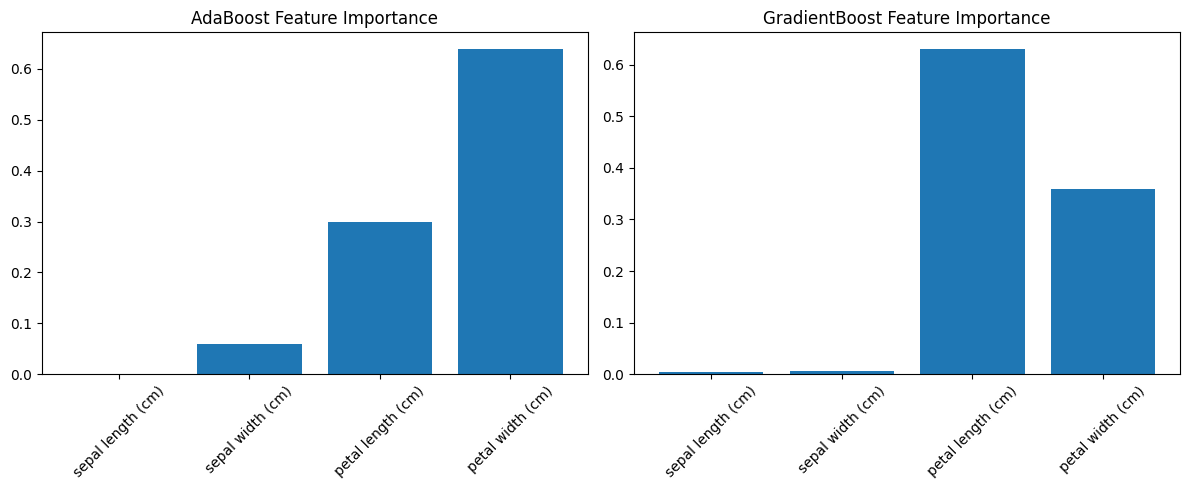

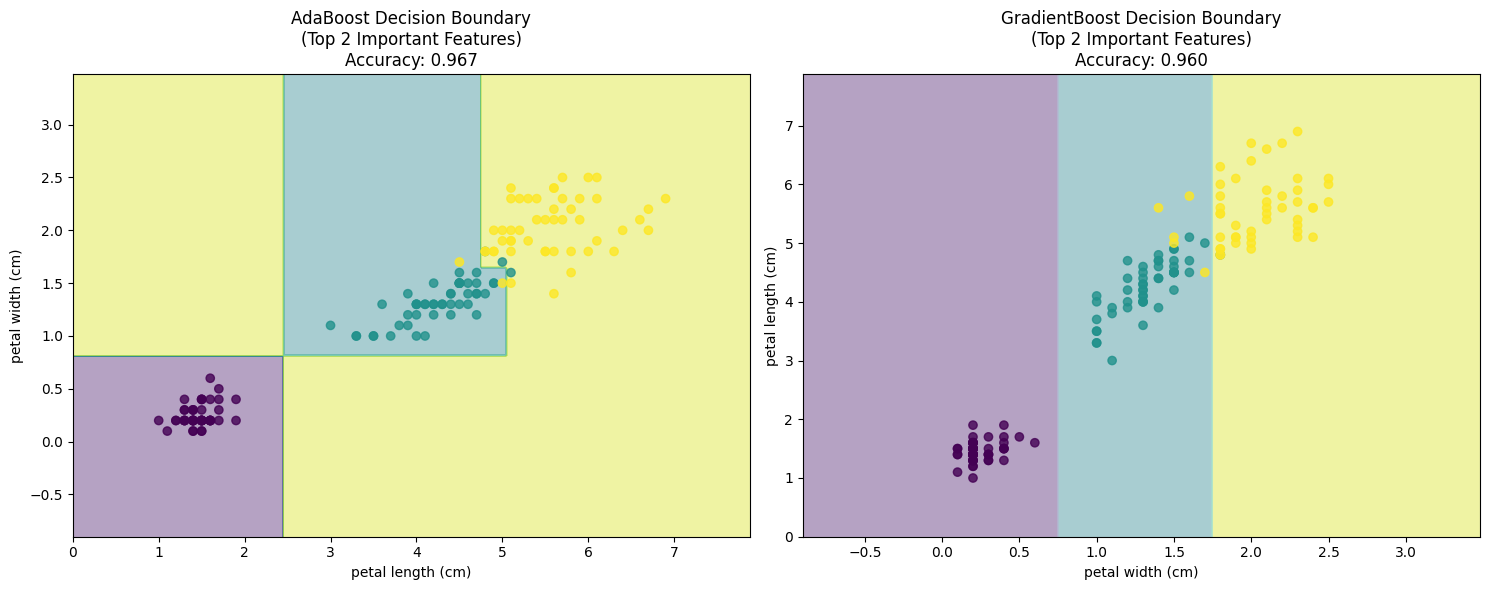


AdaBoost Classification Report (Top 2 Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.94      0.95        50
   virginica       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


GradientBoost Classification Report (Top 2 Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.91      0.98      0.94        50
   virginica       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Initialize the base models to get feature importance
ada_boost_full = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)

grad_boost_full = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=1.0,
    max_depth=1,
    random_state=42
)

# Fit models on full feature set to get importance
ada_boost_full.fit(X, y)
grad_boost_full.fit(X, y)

# Get feature importance for AdaBoost
ada_importance = np.zeros(X.shape[1])
for estimator in ada_boost_full.estimators_:
    ada_importance += estimator.feature_importances_
ada_importance /= len(ada_boost_full.estimators_)

# Get feature importance for GradientBoost
grad_importance = grad_boost_full.feature_importances_

# Create feature importance plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(feature_names, ada_importance)
plt.title('AdaBoost Feature Importance')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(feature_names, grad_importance)
plt.title('GradientBoost Feature Importance')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Get indices of two most important features for each model
ada_top2 = np.argsort(ada_importance)[-2:]
grad_top2 = np.argsort(grad_importance)[-2:]

# Initialize classifiers with regularization
ada_boost_reg = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, ccp_alpha=0.1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME',
    random_state=42
)

grad_boost_reg = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=1.0,
    max_depth=1,
    random_state=42,
    ccp_alpha=0.1,
    subsample=0.8,
    min_samples_split=5
)

# Function to plot decision boundary
def plot_decision_boundary(ax, model, X, y, feature_indices, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Create mesh grid points using only the selected features
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Make predictions
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    accuracy = accuracy_score(y, model.predict(X))
    
    ax.contourf(xx, yy, Z, alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    ax.set_xlabel(feature_names[feature_indices[0]])
    ax.set_ylabel(feature_names[feature_indices[1]])
    ax.set_title(f'{title}\nAccuracy: {accuracy:.3f}')
    return scatter

# Create separate plots for AdaBoost and GradientBoost with their most important features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Train and plot AdaBoost with its most important features
X_ada = X[:, ada_top2]
ada_boost_reg.fit(X_ada, y)
scatter1 = plot_decision_boundary(ax1, ada_boost_reg, X_ada, y, ada_top2, 
                                'AdaBoost Decision Boundary\n(Top 2 Important Features)')

# Train and plot GradientBoost with its most important features
X_grad = X[:, grad_top2]
grad_boost_reg.fit(X_grad, y)
scatter2 = plot_decision_boundary(ax2, grad_boost_reg, X_grad, y, grad_top2, 
                                'GradientBoost Decision Boundary\n(Top 2 Important Features)')

plt.tight_layout()
plt.show()

# Print classification reports
print("\nAdaBoost Classification Report (Top 2 Features):")
y_pred_ada = ada_boost_reg.predict(X_ada)
print(classification_report(y, y_pred_ada, target_names=iris.target_names))

print("\nGradientBoost Classification Report (Top 2 Features):")
y_pred_grad = grad_boost_reg.predict(X_grad)
print(classification_report(y, y_pred_grad, target_names=iris.target_names))

The main difference between the models is that AdaBoost creates more sharp, rectangular decision boundaries (like a step function), while GradientBoost shows slightly smoother transitions between classes. This reflects their underlying algorithms - AdaBoost tends to make more binary decisions while GradientBoost can create more nuanced boundaries.

# Extreme Gradient Boosting

XGBoost (Extreme Gradient Boosting) is an optimized and highly efficient implementation of gradient boosting machines that has become one of the most powerful and widely-used algorithms in machine learning. At its core, XGBoost builds an ensemble of weak decision trees sequentially, where each tree tries to correct the errors made by the previous trees, but with several sophisticated enhancements. It employs a novel tree learning algorithm that handles sparse data and implements parallel processing for faster computation. The algorithm uses a more regularized model formalization to prevent overfitting, incorporating both L1 (Lasso) and L2 (Ridge) regularization. XGBoost's unique features include handling missing values automatically, tree pruning using "max_depth" parameter and "gamma" minimum loss reduction, and a built-in mechanism to calculate feature importance. It implements a "weighted quantile sketch" algorithm to handle weighted data and proposing candidate split points, alongside a sparsity-aware split finding technique for handling missing values and sparse features. The system is designed to efficiently use hardware resources through cache awareness and blocks for out-of-core computation (handling data that doesn't fit into memory). What sets XGBoost apart is its ability to automatically handle different types of objective functions, including regression, classification, and ranking tasks, while offering system-level optimizations like parallel processing, tree pruning, and hardware optimization. The algorithm also provides built-in cross-validation and early stopping capabilities, making it both powerful and practical for real-world applications. Its sophisticated regularization techniques, combined with the ability to handle various types of predictive tasks, have made it a dominant choice in machine learning competitions and production systems alike.

## Key Improvements Highlighted

### 1. Handling Missing Features
- **Sparsity-Aware Split Finding**
  - Introduced to effectively handle datasets with missing or sparse features during decision tree training.
  - If fills and pushes the data to both left and right trees and calculate the gini based on that.

### 2. Gaining Speed
- **Weighted Quantile Sketch**
  - Uses merging and pruning techniques for approximate and efficient split-finding.
  
- **Parallel Computing**
  - Data is sorted and compressed into blocks to facilitate faster split-finding.

- **Cache-Aware Prefetching**
  - Optimized for efficient read/write operations to enhance performance.

- **Block Compression and Sharding**
  - Implemented to reduce disk read time and improve speed during training.

### 3. Accuracy Gains Through Regularization
- **Mathematical Derivation**
  - New approach for representing decision tree training with leafs and weights, improving the underlying mathematical model.

- **Regularization Term**
  - Added to prevent overfitting, ensuring better generalization on unseen data.


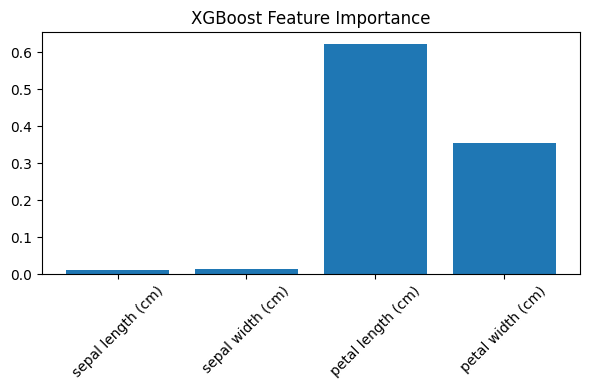

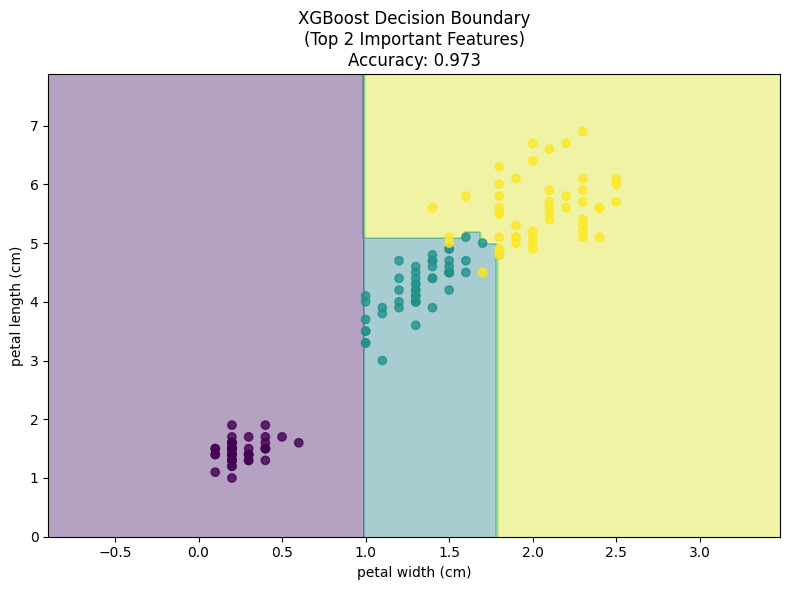


XGBoost Classification Report (Top 2 Features):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.96      0.96        50
   virginica       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [4]:
import xgboost as xgb

# Load the Iris dataset (already loaded in the notebook)
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Initialize XGBoost with similar parameters to match previous analysis
xgb_clf = xgb.XGBClassifier(
    n_estimators=50,  # Match the number of estimators used in other models
    learning_rate=1.0,  # Match the learning rate
    max_depth=1,      # Match the tree depth
    objective='multi:softprob',
    num_class=3,
    random_state=42
)

# Fit the model
xgb_clf.fit(X, y)

# Get feature importance
importance_scores = xgb_clf.feature_importances_

# Plot feature importance alongside existing plots
plt.figure(figsize=(6, 4))
plt.bar(feature_names, importance_scores)
plt.title('XGBoost Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get the two most important features
top_features_idx = np.argsort(importance_scores)[-2:]
X_important = X[:, top_features_idx]

# Train XGBoost with only the important features
xgb_clf_important = xgb.XGBClassifier(
    n_estimators=50,
    learning_rate=1.0,
    max_depth=1,
    objective='multi:softprob',
    num_class=3,
    random_state=42
)
xgb_clf_important.fit(X_important, y)

# Plot decision boundary
fig, ax = plt.subplots(figsize=(8, 6))

# Create mesh grid
h = 0.02
x_min, x_max = X_important[:, 0].min() - 1, X_important[:, 0].max() + 1
y_min, y_max = X_important[:, 1].min() - 1, X_important[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = xgb_clf_important.predict(mesh_points)
Z = Z.reshape(xx.shape)

accuracy = accuracy_score(y, xgb_clf_important.predict(X_important))

# Plot the decision boundary
ax.contourf(xx, yy, Z, alpha=0.4)
scatter = ax.scatter(X_important[:, 0], X_important[:, 1], c=y, alpha=0.8)
ax.set_xlabel(feature_names[top_features_idx[0]])
ax.set_ylabel(feature_names[top_features_idx[1]])
ax.set_title(f'XGBoost Decision Boundary\n(Top 2 Important Features)\nAccuracy: {accuracy:.3f}')

plt.tight_layout()
plt.show()

# Print classification report
print("\nXGBoost Classification Report (Top 2 Features):")
y_pred = xgb_clf_important.predict(X_important)
print(classification_report(y, y_pred, target_names=iris.target_names))

A Decision Tree (DT) model is called a **non-parametric model** because it does not assume any fixed form or distribution for the underlying data. Unlike parametric models (e.g., linear regression), which have a predefined number of parameters, decision trees can grow and adapt their structure based on the complexity of the data. This flexibility allows decision trees to capture non-linear relationships and varying patterns without being restricted by specific assumptions, making them well-suited for diverse datasets.

### XGBoost Objective

The objective of XGBoost (Extreme Gradient Boosting) is to optimize a loss function iteratively while adding decision trees to the model ensemble. The loss function consists of two components: the **training loss**, which measures the model's predictive accuracy (e.g., Mean Squared Error for regression or Log Loss for classification), and a **regularization term**, which controls the model's complexity to prevent overfitting. In each iteration, XGBoost builds a new tree to minimize the loss function by calculating the **gradient** and **Hessian** (second derivative) of the loss for each data point, which helps in determining the optimal split at each tree node. The regularization term ensures smoother predictions by penalizing overly complex trees, using factors like the number of leaf nodes and the weight of each leaf.

#### Example:
Suppose you're predicting house prices, and your loss function is **Mean Squared Error (MSE)**. Starting with an initial prediction (e.g., the mean price), XGBoost calculates the residuals (differences between actual and predicted prices) and builds a tree to minimize these residuals. For each split in the tree, it evaluates the gradient (how much the residual would reduce) and the Hessian (how stable the reduction is). After determining the best splits and adjusting predictions, XGBoost regularizes the tree by limiting its depth or penalizing large leaf weights to avoid overfitting. This process is repeated iteratively, with each tree improving upon the ensemble's overall accuracy.

### XGBoost Training Process and Prediction Formula

The training of XGBoost is a modified version of regular Gradient Boosted Regression Trees (GBRT). Key components include:

- Consider a set of trees $F_t \in \mathcal{F}$, which are members of the family of CART (Classification and Regression Trees).
- Let $T_t$ represent the number of leaves in tree $F_t$.
- Define a function $q_t(x_i) \to \{1, 2, \dots, T_t\}$, which maps a data point $x_i$ to a specific leaf in tree $F_t$.
- Each tree provides a prediction for $x_i$ based on the weight associated with the leaf it lands in:
  $$F_t(x_i) = w_{q_t(x_i)}$$
  where $\mathbf{w}$ is the vector of weights corresponding to the leaves of tree $F_t$.
- The final prediction for a data point $x_i$ is the sum of the leaf scores across all $n$ trees:
  $$\hat{y}_i = \sum_{t=1}^{n} F_t(x_i) = \sum_{t=1}^{n} w_{q_t(x_i)}$$

#### Example:

Consider the following:

- **Tree 1:** Splits on features like "age < 15" and "is male," with leaf weights of $+2$, $+0.1$, and $-1$.
- **Tree 2:** Splits on "uses a computer daily," with leaf weights of $+0.9$ and $-0.9$.

For an individual:

- If a young boy passes through Tree 1's splits to a leaf with weight $+2$ and Tree 2's splits to a leaf with weight $+0.9$, their combined prediction is:
  $$\hat{y} = 2 + 0.9 = 2.9.$$
- For an older individual using the computer daily, they pass through leaves with weights $-1$ and $-0.9$, resulting in:
  $$\hat{y} = -1 - 0.9 = -1.9.$$

The training process in XGBoost is iterative and involves:

1. **Tree Addition or Splitting:**
   - The training process greedily adds new trees or splits the leaves of an existing tree to improve the model's performance.
   - Decisions to add a new tree or split an existing one are guided by the reduction in the objective function.

2. **Objective Function:**
   - The total objective function combines a loss function and a regularization term:
     $$\mathcal{L}(\phi) = \sum_{i} l(\hat{y}_i, y_i) + \sum_{k} \Omega(f_k)$$
     where:
     - $l(\hat{y}_i, y_i)$ is the loss for each data point.
     - $\Omega(f)$ is the regularization term defined as:
       $$\Omega(f) = \gamma T + \frac{1}{2} \lambda \|\mathbf{w}\|^2$$
       Here, $T$ represents the number of leaves, $\gamma$ controls model complexity, and $\lambda$ penalizes large weights.

3. **Additive Model Training:**
   - At each iteration $t$, the objective is updated by adding a new tree:
     $$\mathcal{L}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t-1)} + f_t(x_i)) + \Omega(f_t)$$
   - This ensures the model incrementally improves.

4. **Taylor Expansion for Optimization:**
   - XGBoost uses a second-order Taylor expansion to approximate the loss function efficiently, requiring only the gradient ($g$) and Hessian ($h$):
     $$\hat{\mathcal{L}}^{(t)} = \sum_{i=1}^{n} \left[g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i)\right] + \Omega(f_t)$$
     - $g_i = \frac{\partial l(y_i, \hat{y}_i)}{\partial \hat{y}_i}$ (gradient of the loss)
     - $h_i = \frac{\partial^2 l(y_i, \hat{y}_i)}{\partial \hat{y}_i^2}$ (Hessian or second derivative of the loss)

This framework allows XGBoost to efficiently optimize splits, compute leaf scores, and regulate model complexity, ensuring both accuracy and generalization.

$$
\tilde{\mathcal{L}}^{(t)} = \sum_{i=1}^n \left[ g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i) \right] + \Omega(f_t)
$$

$$
\tilde{\mathcal{L}}^{(t)} = \sum_{i=1}^n \left[ g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i) \right] + \gamma T + \frac{1}{2} \lambda \sum_{j=1}^T w_j^2
$$

Expanding further:

$$
\tilde{\mathcal{L}}^{(t)} = \sum_{j=1}^T \left[ \sum_{i \in I_j} g_i w_j + \frac{1}{2} \left( \sum_{i \in I_j} h_i + \lambda \right) w_j^2 \right] + \gamma T
$$

Optimal weight:

$$
w_j^* = -\frac{\sum_{i \in I_j} g_i}{\sum_{i \in I_j} h_i + \lambda}
$$

Objective function:

$$
\tilde{\mathcal{L}}^{(t)}(q) = -\frac{1}{2} \sum_{j=1}^T \frac{\left( \sum_{i \in I_j} g_i \right)^2}{\sum_{i \in I_j} h_i + \lambda} + \gamma T
$$

### Most Important Hyperparameters
- Tree-specific hyperparameters control the construction and complexity of the decision trees:
  - max_depth: maximum depth of a tree. Deeper trees can capture more complex patterns in the data, but may also lead to overfitting.
  - min_child_weight: minimum sum of instance weight (hessian) needed in a child. This can be used to control the complexity of the decision tree by preventing the creation of too small leaves.
  - subsample: percentage of rows used for each tree construction. Lowering this value can prevent overfitting by training on a smaller subset of the data.
  - colsample_bytree: percentage of columns used for each tree construction. Lowering this value can prevent overfitting by training on a subset of the features.
- Learning task-specific hyperparameters control the overall behavior of the model and the learning process:
  - eta (also known as learning rate): step size shrinkage used in updates to prevent overfitting. Lower values make the model more robust by taking smaller steps.
  - gamma: minimum loss reduction required to make a further partition on a leaf node of the tree. Higher values increase the regularization.
  - lambda: L2 regularization term on weights. Higher values increase the regularization.
  - alpha: L1 regularization term on weights. Higher values increase the regularization.

• XGBoost: https://xgboost.readthedocs.io/en/stable/tutorials/model.html

• HyperOpt: http://hyperopt.github.io/hyperopt/

• Walk through Code Example: https://medium.com/optuna/using-optuna-to-optimize-xgboost-hyperparameters-63bfcdfd3407

## Hyperparameter Optimization

Optuna and HyperOpt are both powerful open-source libraries for hyperparameter optimization in machine learning. While they have some similarities, they also have unique features and approaches.

### Optuna

Optuna uses an efficient optimization algorithm called Tree-structured Parzen Estimator (TPE) to navigate the hyperparameter search space. TPE builds a probabilistic model of the objective function and uses this model to guide the search towards promising regions of the hyperparameter space. Optuna also supports other optimization algorithms, such as Gaussian Process and Random Search.

One of Optuna's key features is its adaptive trial pruning, which allows it to stop unpromising trials early, saving valuable computational resources. Optuna also supports parallel execution, enabling users to leverage multiple CPU/GPU resources to speed up the optimization process.

Optuna provides a user-friendly API that makes it easy to define objective functions and manage optimization trials. It also offers advanced features like multi-objective optimization, which allows users to optimize multiple metrics simultaneously.

### HyperOpt

HyperOpt, on the other hand, uses a different optimization algorithm called Tree-structured Parzen Estimator (TPE), similar to Optuna. However, HyperOpt's implementation of TPE is designed to handle more complex search spaces, including real-valued, discrete, and conditional hyperparameters.

HyperOpt's key strength is its flexibility in defining search spaces. Users can create complex, hierarchical search spaces that include conditional relationships between hyperparameters. This makes HyperOpt well-suited for optimizing machine learning models with many interdependent hyperparameters.

Like Optuna, HyperOpt supports parallel execution, allowing users to leverage multiple CPU/GPU resources to speed up the optimization process. HyperOpt also provides several other optimization algorithms, such as Random Search and Adaptive Random Search, giving users more choices to explore the hyperparameter space.

## Alternatives to XGBoost

- CatBoost: A gradient boosting framework developed by Yandex that supports categorical features out-of-the-box. https://catboost.ai/en/docs/concepts/tutorials
- HistGradientBoosting: A gradient boosting implementation in scikit-learn that uses histogram-based algorithms for improved efficiency. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html
- LightGBM: A gradient boosting framework developed by Microsoft that uses tree-based learning algorithms, focusing on efficiency and scalability. https://github.com/Microsoft/LightGBM

**Key Differences:**
- **Missing Value Handling:**
  - XGBoost and LightGBM try both options (send missing to left or right) and choose the best.
  - CatBoost assumes missing values are less than the minimum (or greater than the maximum) and proceeds accordingly.
- **Split Finding:**
  - XGBoost uses a weighted quantile split strategy (histogram-based).
  - LightGBM uses Gradient-based One-Side Sampling and Exclusive Feature Bundling to reduce the number of data points and features per node for split finding.
  - CatBoost uses Ordered Target Statistics, a histogram-based split.
- **Tree Growth:**
  - LightGBM uses leaf-wise (best-first) splitting, leading to faster solutions but potentially lower accuracy.
  - CatBoost uses level-wise (breadth-first) splitting.
  - XGBoost supports both leaf-wise and level-wise splitting.

In summary, while XGBoost, LightGBM, and CatBoost are all powerful gradient boosting frameworks, they differ in their approaches to missing value handling, split finding algorithms, and tree growth strategies, offering different trade-offs in terms of efficiency, scalability, and accuracy.

Remark: On comparing Deep Networks with Gradient Boosting Models (GBM), evidence shows that GBM is better for Tabular Data.

## Summary of ML

![Alt Text](https://i.imgur.com/M0kuKL3.png)

- In Deep learning and Data Science, you rarely need beyond
  - Boosting Models for tabular Data
  - Convolutional Models for Image data
  - Transformer Models for Text and Speech Data (and Generative Image)
- In Classical Data and ML
  - PCA or t-SNE for visualization
  - K-Means, DBSCAN and Agglomerative Clustering for Clustering
  - K-NN for regression/classification baselines

### LightGBM

Key Differences Between LightGBM and XGBoost:

- Histogram-based split finding (faster, less memory)
- Leaf-wise tree growth instead of level wise (faster convergence)
- Categorical feature optimization
- Distributed learning optimizations
- Feature/data/voting parallelism
- Gradient-based One-Sided Sampling and Exclusive Feature Bundling to reduce data/features

LightGBM is the fastest among Gradient Boosting Decision Tree models.

### CatBoost

- Main difference from XGBoost is the way categorical data is handled. CatBoost can handle categorical data, text data and encodings out of the box.
- It uses a histogram-based split in a special form called as Ordered Target Statistics.
- It uses level-wise split finding.